<a href="https://colab.research.google.com/github/Neural-Team/HiggsBoson-ML/blob/main/Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

high_level_features = ('m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb')                              #7 high level features

low_level_features = ('lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude', 'missing_energy_phi', #21 low level features
                    'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_b-tag',
                    'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_b-tag',
                    'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_b-tag',
                    'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_b-tag')

all_features = low_level_features + high_level_features  #all 28 features

csv_file = "/content/drive/My Drive/Dataset/HIGGS_train.csv"
dataset = pd.read_csv(csv_file, low_memory = False, names = tuple(['class']) + all_features)

In [158]:
#Clean data

# Convert strings to float
dataset = dataset.apply(pd.to_numeric, errors = 'coerce')

# Remove rows with non-float entries
dataset = dataset.dropna()

In [159]:
NUMBER_OF_LOW_LEVEL_FEATURES = len(low_level_features)

# choose between low_level_features, high_level_features, 
# or all_features depending on what features you would like to use
model_features = all_features 

# create X and y sets
if ( model_features == all_features ):
  X = dataset.iloc[:, 1:]
elif ( model_features == low_level_features ):
  X = dataset.iloc[:, 1:NUMBER_OF_LOW_LEVEL_FEATURES + 1]
elif ( model_features == high_level_features ):
  X = dataset.iloc[:, NUMBER_OF_LOW_LEVEL_FEATURES + 1:]

y = dataset.iloc[:, 0]

In [160]:
from sklearn.preprocessing import StandardScaler

# Normalize (scale) the data
scaler = StandardScaler()
X = pd.DataFrame( scaler.fit_transform(X), columns = model_features )
# causes errors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599996 entries, 0 to 599995
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   lepton_pT                 599996 non-null  float64
 1   lepton_eta                599996 non-null  float64
 2   lepton_phi                599996 non-null  float64
 3   missing_energy_magnitude  599996 non-null  float64
 4   missing_energy_phi        599996 non-null  float64
 5   jet_1_pt                  599996 non-null  float64
 6   jet_1_eta                 599996 non-null  float64
 7   jet_1_phi                 599996 non-null  float64
 8   jet_1_b-tag               599996 non-null  float64
 9   jet_2_pt                  599996 non-null  float64
 10  jet_2_eta                 599996 non-null  float64
 11  jet_2_phi                 599996 non-null  float64
 12  jet_2_b-tag               599996 non-null  float64
 13  jet_3_pt                  599996 non-null  f

1.0    317568
0.0    282428
Name: class, dtype: int64

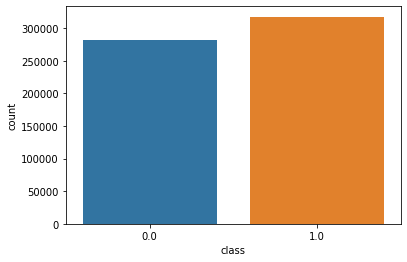

In [161]:
#Data analysis
X.info()

#check distribution of data
sns.countplot(data = dataset, x = 'class')
dataset['class'].value_counts()

In [162]:
#Encoding
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

for i in model_features:
    X[i] = label_encoder.fit_transform(X[i])

X.head()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b-tag,jet_2_pt,...,jet_4_eta,jet_4_phi,jet_4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,594,508,1462,1129,384,605,948,65,0,848,...,1158,1072,2,915,635,551,540,757,631,478
1,633,1478,1595,1852,761,861,639,15,2,624,...,136,1153,0,182,488,559,598,815,634,399
2,524,2196,10,1256,4893,861,2227,2274,0,663,...,2204,2136,0,790,666,559,571,838,508,381
3,759,266,2172,1901,5349,930,132,132,0,953,...,472,38,0,827,658,572,348,904,645,559
4,736,1470,2288,1685,53,532,190,152,0,612,...,776,1349,0,636,691,560,458,1048,514,409


In [163]:
#Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2) 
#TO-DO: EXPERIMENT WITH TEST/TRAINING SPLITS

In [164]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter = 5000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

In [165]:
#Testing vs Training accuracy 
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

testing_accuracy = lr_model.score(X_test, y_test)*100
training_accuracy = lr_model.score(X_train, y_train)*100
print("testing accuracy: {:.2f}%".format(testing_accuracy))
print("training accuracy: {:.2f}%".format(training_accuracy))

testing accuracy: 63.07%
training accuracy: 62.92%


              precision    recall  f1-score   support

         0.0       0.62      0.55      0.59     84523
         1.0       0.64      0.70      0.67     95476

    accuracy                           0.63    179999
   macro avg       0.63      0.63      0.63    179999
weighted avg       0.63      0.63      0.63    179999



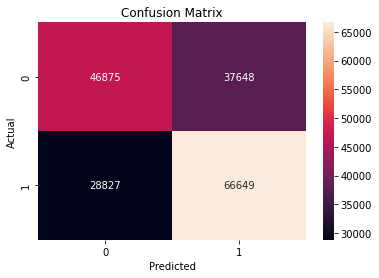

In [166]:
#Testing data: Classification report and Confusion matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot = True, fmt = "d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#LOW LEVEL SEEMS TO HAVE VERY DIFFERENT CONFUSION MATRIX THAN HIGH LEVEL
print(classification_report(y_test, y_pred))